In [1]:
import sys
sys.path.append('../bin/')
from load_data import *
from estimate_covariance import *
from make_figures import *
from classify import *
from utils import *
import matplotlib.pyplot as plt
import time


In [2]:
input_data = 'cifar10'
num_classes= 10
DATA_SHAPE = 32*31*3
num_comp   = [16,32,128,512,1024,2048,DATA_SHAPE]
outpath    = '../outputs/%s/classification/'%input_data
covpath    = '../outputs/%s/covariance_estimator/'%input_data
plotpath   = '../outputs/%s/figures/'%input_data
modes      = ['ML']#,'LW','NERCOME']
pca        = True
masks      = [False]

In [3]:
if input_data == 'mnist':
    load_data = load_mnist
if input_data == 'cifar10':
    load_data = load_cifar10

In [4]:
x_train, targets_train, x_test, targets_test, _ = load_data()
print(targets_train.shape, x_train.shape, x_test.shape, targets_test.shape)

(50000,) (50000, 3072) (10000, 3072) (10000,)


In [5]:
d_v, mv_in, mv_out = prepare_data(data=x_train,labels=targets_train, num_classes=num_classes)
d_t, mt_in, mt_out = prepare_data(data=x_test,labels=targets_test, num_classes=num_classes)

In [6]:
estimate_covariances(d_v,mv_in,mv_out,modes,masks,covpath,pca=False)

../outputs/cifar10/covariance_estimator/cov_estimate_ML_0.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_1.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_2.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_3.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_4.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_5.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_6.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_7.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_8.pkl
../outputs/cifar10/covariance_estimator/cov_estimate_ML_9.pkl


True

In [7]:
results = perform_classification(x_test, targets_test, modes,masks, num_classes,num_comp, inpath=covpath, outpath=outpath, pca=pca, tag='test', rerun=False)

../outputs/cifar10/classification/results_test.pkl ../outputs/cifar10/classification/
ML inpainted 16
ML inpainted 32
ML inpainted 128
ML inpainted 512
ML inpainted 1024
ML inpainted 2048
ML inpainted 2976
pca 16


AttributeError: 'CovarianceEstimator' object has no attribute 'pca_R'

../outputs/mnist/figures/MLvsPCA_masked.png


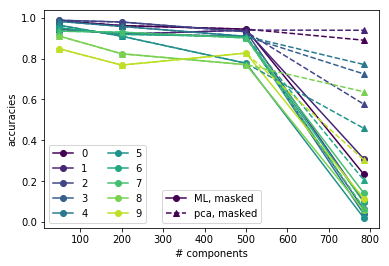

In [9]:
_=make_acc_figure(['ML','pca'],['masked'],results,num_classes,num_comp,plotpath,'MLvsPCA_masked.png')

../outputs/mnist/figures/MLvsPCA_inpainted.png


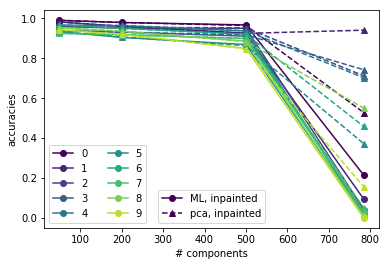

In [11]:
_=make_acc_figure(['ML','pca'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsPCA_inpainted.png')

../outputs/mnist/figures/MLvsLW_masked.png


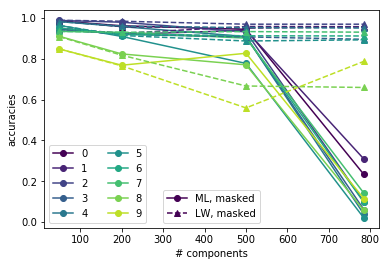

In [12]:
_=make_acc_figure(['ML','LW'],['masked'],results,num_classes,num_comp,plotpath,'MLvsLW_masked.png')

../outputs/mnist/figures/MLvsLW_inpainted.png


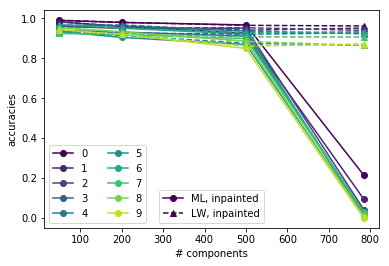

In [13]:
_=make_acc_figure(['ML','LW'],['inpainted'],results,num_classes,num_comp,plotpath,'MLvsLW_inpainted.png')

../outputs/mnist/figures/LWvsNERCOME_inpainted.png


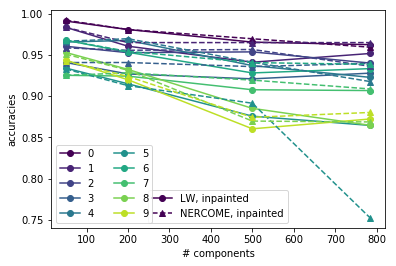

In [14]:
_=make_acc_figure(['LW','NERCOME'],['inpainted'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_inpainted.png')

../outputs/mnist/figures/LWvsNERCOME_masked.png


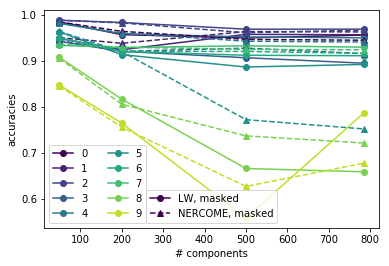

In [15]:
_=make_acc_figure(['LW','NERCOME'],['masked'],results,num_classes,num_comp,plotpath,'LWvsNERCOME_masked.png')